Create dummy Ocean Response Functions and add to combined data set

Can replace this by TOTL-derived ORFs once available

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut

In [2]:
#Read larmip data
ds = xr.open_dataset('../data/larmiptemp.nc')

ds['exp'] = ['EAIS','ROSS','AMUN','WEDD','PENS','TOTL','HALF','DOUB']

In [3]:
#Create variable

orf  = np.zeros((len(ds.rftime),len(ds.exp),len(ds.basin)))

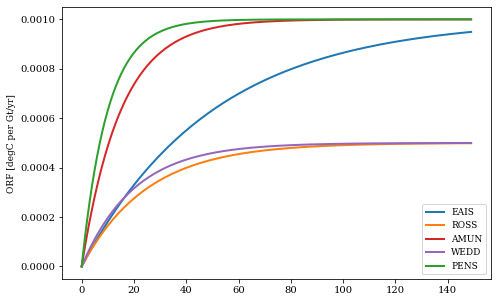

In [4]:
#Magnitude and time scale of response 

pert = 400 #Gt/yr

mag = [.4,.2,.4,.2,.4] #degC
tsc = [50,25,15,20,10] #year

for b,bas in enumerate(ds.basin):
    orf[:,b,b] = mag[b]*(1-np.exp(-ds.rftime/tsc[b]))/pert

for b,bas in enumerate(ds.basin):
    orf[:,5,b] = orf[:,b,b]

orf[:,6,:] = .5* orf[:,5,:]
orf[:,7,:] =  2* orf[:,5,:]

for b,bas in enumerate(ds.basin.values):
    plt.plot(ds.rftime,orf[:,5,b],c=ut.bcol[bas],label=bas)
plt.legend()
plt.ylabel('ORF [degC per Gt/yr]')
plt.show()

In [6]:
#Save as combined netcdf file

ds['orf']  = xr.DataArray(orf,dims=('rftime','exp','basin'),attrs={'unit':'degrees Celcius per Gt/yr','long_name':'ocean response function to increased mass loss'})

ds.to_netcdf(f'../data/dummy.nc',mode='w')
ds.close()